In [19]:
## Importación de los datasets
import pandas as pd
import numpy as np
import geopandas as gpd

In [20]:
## Se importan los datasets
# Corregimos la lectura de poblacion para que las columnas se separen correctamente
df_poblacion = pd.read_csv('data/Malla de 250m-20220101.csv', sep=',', engine='python')

# Empleo y variaciones se leen igual
empleo = pd.read_csv('data/e30307a_dsc_0032.csv', sep=',')
variaciones = pd.read_csv('data/Malla de 250m-2024.csv', sep=',')

## Se muestran las primeras filas de los datasets
print("Dataset de población:")
print(df_poblacion.head())
print("\nDataset de empleo:")
print(empleo.head())
print("\nDataset de variaciones:")
print(variaciones.head())

## Se importa el dataset espacial
grid = gpd.read_file('data/Malla de 250m-20220101.json')

# Se muestra el dataset espacial
print("\nDataset espacial:")
print(grid.head())


/tmp/ipykernel_6032/2478253663.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  empleo = pd.read_csv('data/e30307a_dsc_0032.csv', sep=',')


Dataset de población:
                                                 FID   ano geoparent  \
0  Malla de 250m-20220101.fid-68150d23_197ad17ab1...  2022     35030   
1  Malla de 250m-20220101.fid-68150d23_197ad17ab1...  2022     35030   
2  Malla de 250m-20220101.fid-68150d23_197ad17ab1...  2022     35022   
3  Malla de 250m-20220101.fid-68150d23_197ad17ab1...  2022     35022   
4  Malla de 250m-20220101.fid-68150d23_197ad17ab1...  2022     35022   

  granularity             geocode   isla gcomarca   comarca municipio  \
0    GRID_250  250mN095375E194450  ES704  ES704A0  ES704A03     35030   
1    GRID_250  250mN095525E194275  ES704  ES704A0  ES704A03     35030   
2    GRID_250  250mN096500E179950  ES705  ES705A3  ES705A32     35022   
3    GRID_250  250mN095600E180575  ES705  ES705A3  ES705A32     35022   
4    GRID_250  250mN095625E180575  ES705  ES705A3  ES705A32     35022   

   poblacion  ...  poblacion_12a15  poblacion_16a17  poblacion_00a17  \
0         18  ...              NaN

In [21]:
# Mostrar las columnas de cada DataFrame para identificar la clave de unión
print('Columnas de poblacion:', df_poblacion.columns.tolist())
print('Columnas de empleo:', empleo.columns.tolist())
print('Columnas de variaciones:', variaciones.columns.tolist())
print('Columnas de grid:', grid.columns.tolist())

Columnas de poblacion: ['FID', 'ano', 'geoparent', 'granularity', 'geocode', 'isla', 'gcomarca', 'comarca', 'municipio', 'poblacion', 'poblacion_edad_media', 'poblacion_edad_media_d', 'poblacion_hombres', 'poblacion_mujeres', 'poblacion_indice_feminidad', 'poblacion_nacional', 'poblacion_extranjera', 'poblacion_extranjera_pc', 'poblacion_00a14', 'poblacion_15a64', 'poblacion_65mas', 'poblacion_65a74', 'poblacion_75a84', 'poblacion_85mas', 'poblacion_00a14_pc', 'poblacion_15a64_pc', 'poblacion_65mas_pc', 'poblacion_indice_dependencia', 'poblacion_indice_dependencia_may', 'poblacion_indice_dependencia_men', 'poblacion_indice_vejez', 'poblacion_indice_juventud', 'poblacion_indice_sobreenvejecimi', 'poblacion_indice_ancianidad', 'superficie', 'poblacion_ds', 'poblacion_extranjera_ds', 'poblacion_00a02', 'poblacion_03a05', 'poblacion_06a11', 'poblacion_12a15', 'poblacion_16a17', 'poblacion_00a17', 'poblacion_nacida_canarias', 'poblacion_nacida_es_xcanarias', 'poblacion_nacida_extranjero', '

In [22]:
# Unificación espacial usando la columna clave correcta

# Unir variaciones con grid usando 'geocode'
grid_variaciones = grid.merge(variaciones, left_on='geocode', right_on='geocode', how='left')
print('\nGrid + Variaciones:')
print(grid_variaciones.head())

# Unir población con grid usando 'geocode' (si existe en ambos)
if 'geocode' in df_poblacion.columns and 'geocode' in grid.columns:
    grid_poblacion = grid.merge(df_poblacion, left_on='geocode', right_on='geocode', how='left')
    print('\nGrid + Población:')
    print(grid_poblacion.head())
else:
    print('\nNo se pudo unir población: columna clave no encontrada en ambos DataFrames.')

# Unir empleo con grid usando 'municipio' (si existe en ambos)
if 'municipio' in empleo.columns and 'municipio' in grid.columns:
    grid_empleo = grid.merge(empleo, left_on='municipio', right_on='municipio', how='left')
    print('\nGrid + Empleo:')
    print(grid_empleo.head())
else:
    print('\nNo se pudo unir empleo: columna clave no encontrada en ambos DataFrames.')


Grid + Variaciones:
                                                  id   ano geoparent  \
0  Malla de 250m-20220101.fid-68150d23_197ad42c53...  2022     35030   
1  Malla de 250m-20220101.fid-68150d23_197ad42c53...  2022     35030   
2  Malla de 250m-20220101.fid-68150d23_197ad42c53...  2022     35022   
3  Malla de 250m-20220101.fid-68150d23_197ad42c53...  2022     35022   
4  Malla de 250m-20220101.fid-68150d23_197ad42c53...  2022     35022   

  granularity_x             geocode   isla gcomarca   comarca municipio  \
0      GRID_250  250mN095375E194450  ES704  ES704A0  ES704A03     35030   
1      GRID_250  250mN095525E194275  ES704  ES704A0  ES704A03     35030   
2      GRID_250  250mN096500E179950  ES705  ES705A3  ES705A32     35022   
3      GRID_250  250mN095600E180575  ES705  ES705A3  ES705A32     35022   
4      GRID_250  250mN095625E180575  ES705  ES705A3  ES705A32     35022   

   poblacion  ...  pact_t  pact_f  pocu_t  pocu_m  pocu_f  psal_t  psal_m  \
0         18  ... 

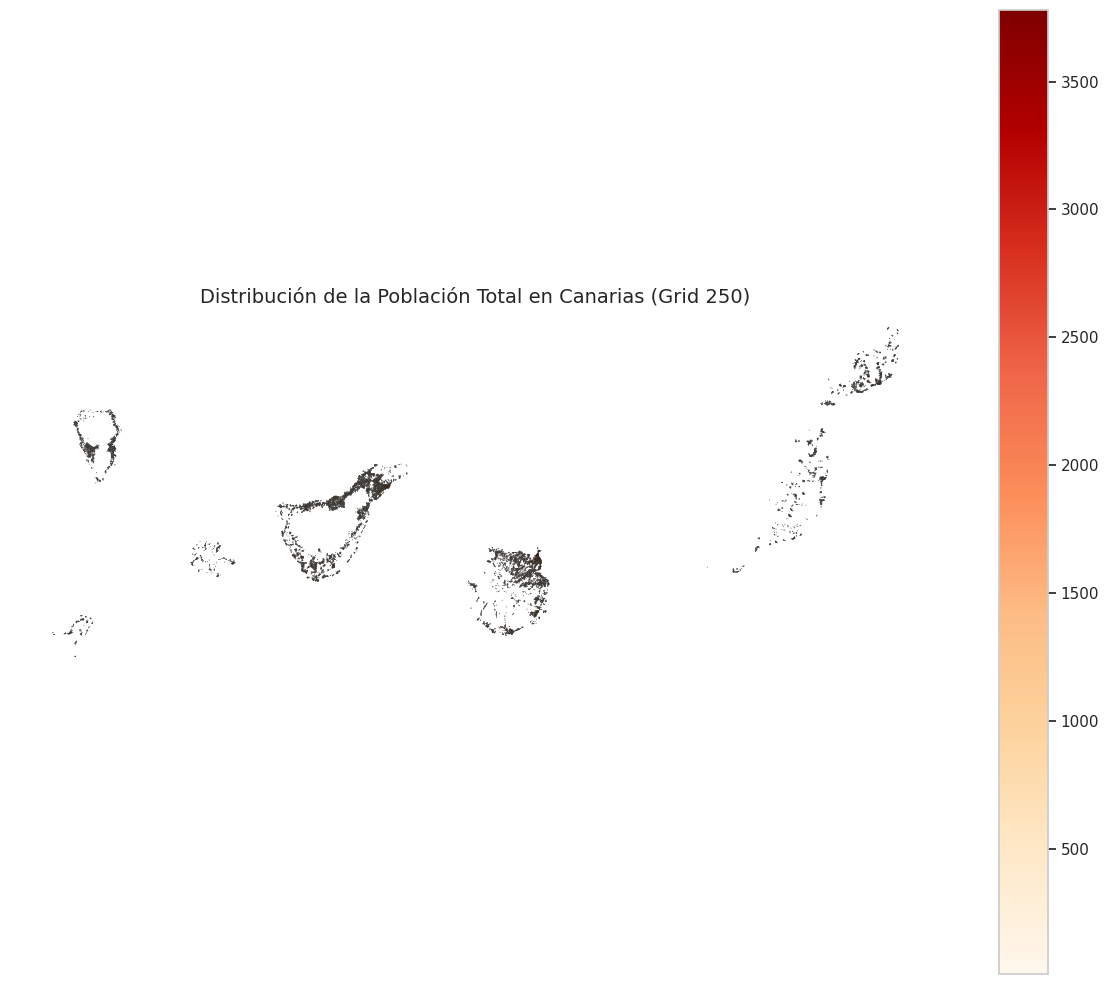

In [23]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
grid.plot(
    column='poblacion', 
    cmap='OrRd', 
    legend=True, 
    ax=ax,
    edgecolor='black',
    linewidth=0.2
)
ax.set_title('Distribución de la Población Total en Canarias (Grid 250)', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

    anios  altas_desde_extranjero
0    1988                  8610.0
1    1989                 13194.0
2    1990                 15888.0
3    1991                 11748.0
4    1992                 10560.0
5    1993                 12798.0
6    1994                 14556.0
7    1995                 13332.0
8    1996                 15792.0
9    1997                 41484.0
10   1998                 53154.0
11   1999                 75930.0
12   2000                140496.0
13   2001                151548.0
14   2002                169926.0
15   2003                174288.0
16   2004                214236.0
17   2005                216042.0
18   2006                232902.0
19   2007                252468.0
20   2008                213000.0
21   2009                145938.0
22   2010                142440.0
23   2011                148080.0
24   2012                142314.0
25   2013                136854.0
26   2014                156264.0
27   2015                177582.0
28   2016     

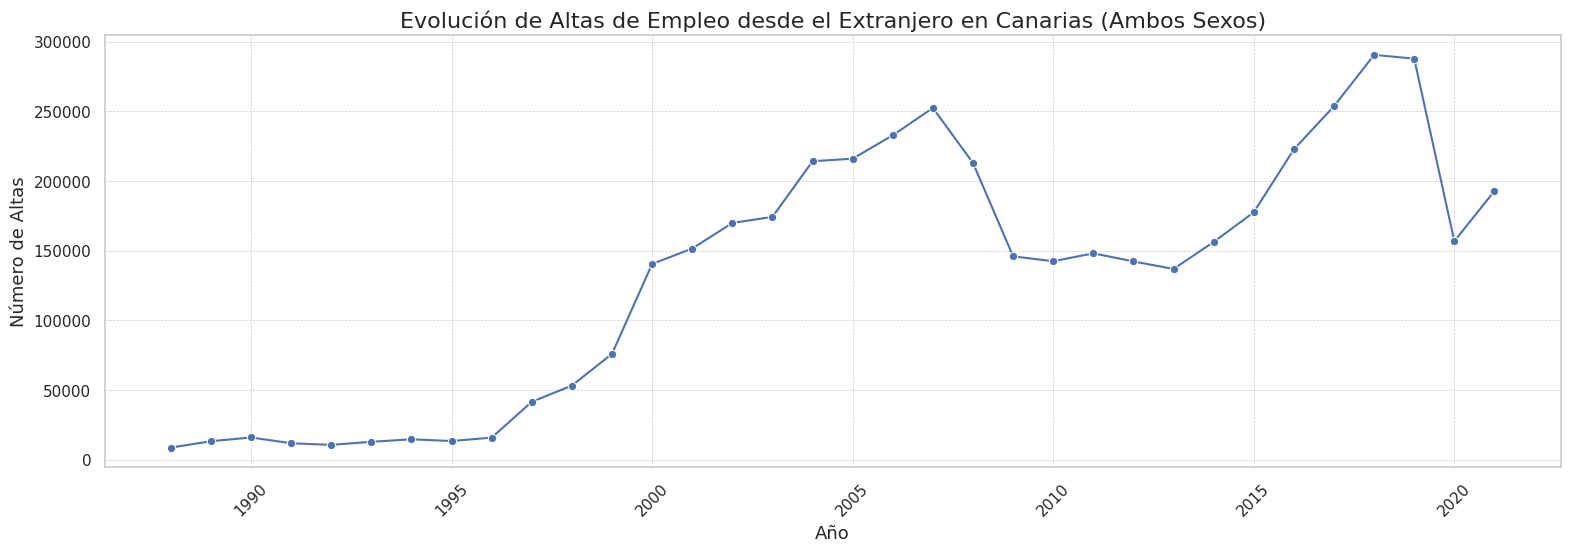

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo filas donde el sexo sea 'Ambos Sexos'
df = empleo.copy()
df = df[df['sexos_nombre'] == 'Ambos sexos']
df['anios'] = pd.to_numeric(df['anios'], errors='coerce')
df['altas_desde_extranjero'] = pd.to_numeric(df['altas_desde_extranjero'], errors='coerce')

# Agrupamos por año
empleo_anual = df.groupby("anios")["altas_desde_extranjero"].sum().reset_index()

# Eliminar filas con datos no válidos o sin altas
empleo_anual = empleo_anual.dropna(subset=['anios', 'altas_desde_extranjero'])
empleo_anual = empleo_anual[empleo_anual['altas_desde_extranjero'] > 0]

print(empleo_anual)

# Graficar solo si hay datos válidos
if not empleo_anual.empty:
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.lineplot(data=empleo_anual, x='anios', y='altas_desde_extranjero', marker='o', ax=ax)
    ax.set_title("Evolución de Altas de Empleo desde el Extranjero en Canarias (Ambos Sexos)", fontsize=16)
    ax.set_xlabel("Año", fontsize=13)
    ax.set_ylabel("Número de Altas", fontsize=13)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)
    plt.subplots_adjust(left=0.07, right=0.98, top=0.90, bottom=0.18)
    plt.show()
else:
    print("No hay datos válidos para graficar.")

In [25]:
import folium
from folium.plugins import HeatMap

# Asegúrate de que haya latitud y longitud
grid['lon'] = grid.geometry.centroid.x
grid['lat'] = grid.geometry.centroid.y

m = folium.Map(location=[28.1, -15.4], zoom_start=7)
heat_data = grid[['lat', 'lon', 'poblacion']].dropna().values.tolist()
HeatMap(heat_data).add_to(m)

m.save("heatmap_poblacion.html")

/tmp/ipykernel_6032/163171856.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['lon'] = grid.geometry.centroid.x
/tmp/ipykernel_6032/163171856.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['lat'] = grid.geometry.centroid.y


/tmp/ipykernel_6032/1617197488.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


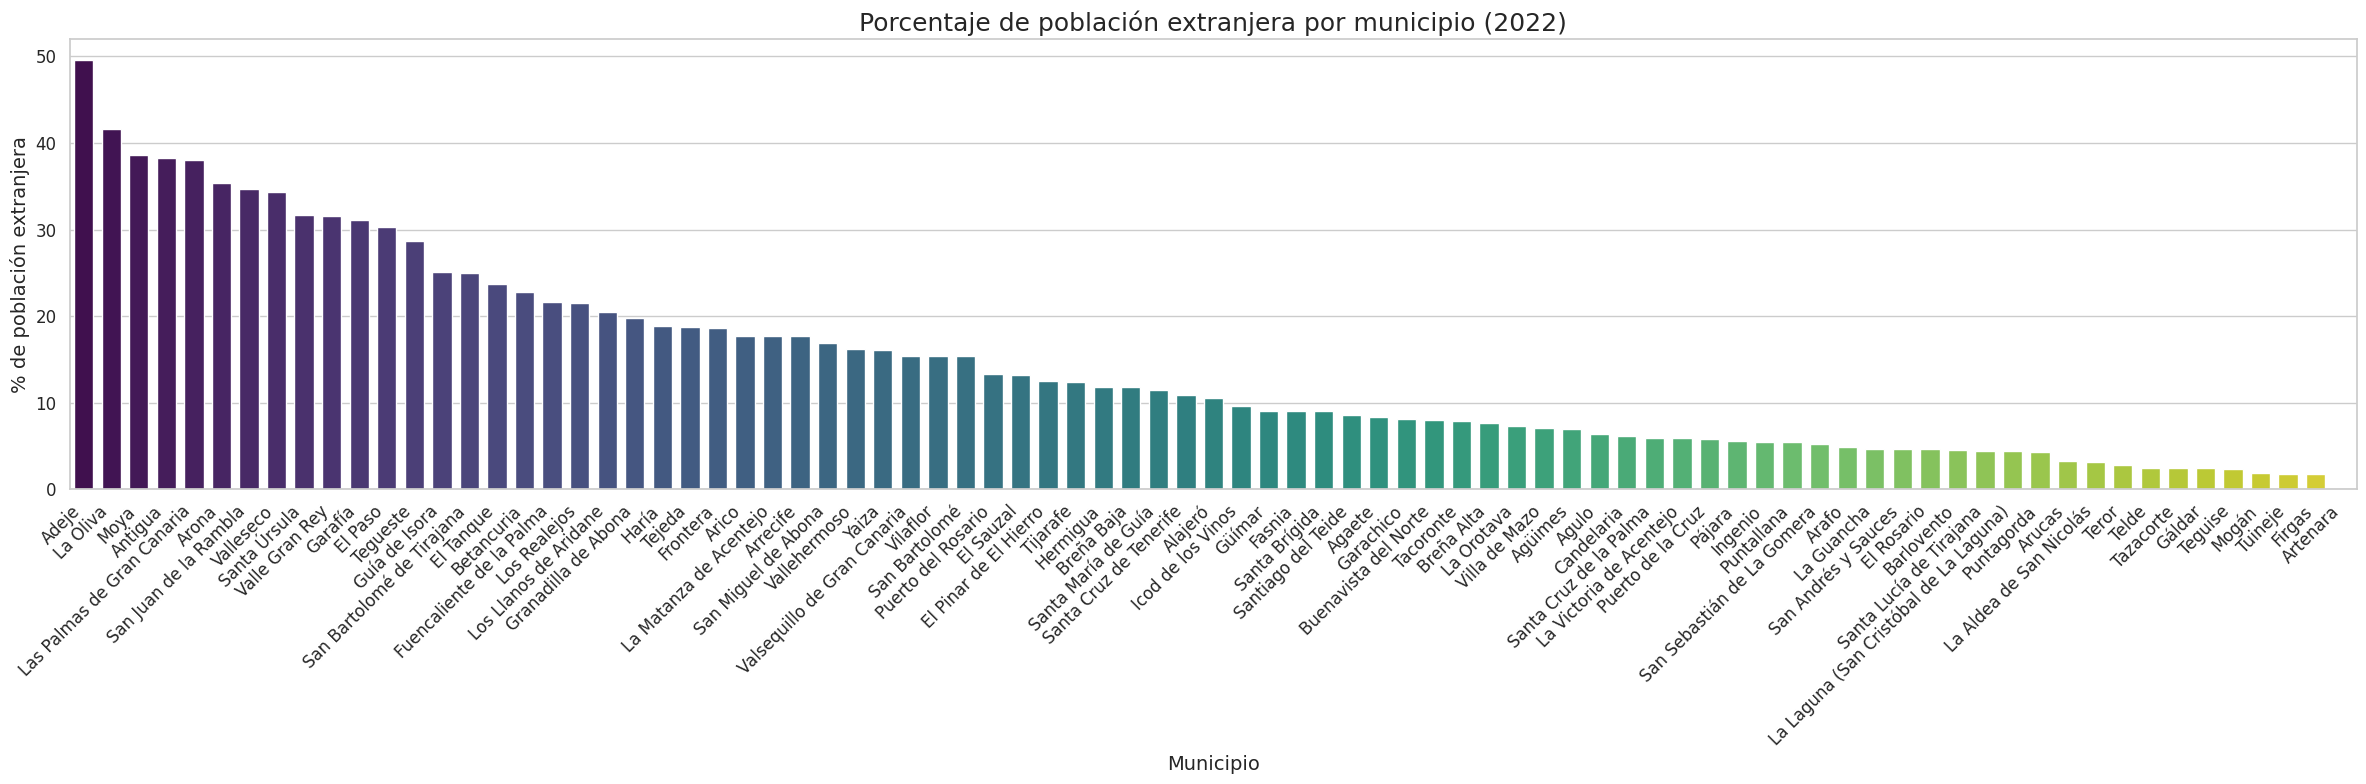

In [39]:
# Agrupar por municipio real y mostrar el porcentaje de población extranjera para el último año disponible
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de equivalencias de códigos de municipios de Canarias
codigos_municipios_canarias = {
    # Provincia de Las Palmas (35)
    '35001': 'Agaete',
    '35002': 'Agüimes',
    '35003': 'Antigua',
    '35004': 'Arrecife',
    '35005': 'Artenara',
    '35006': 'Arucas',
    '35007': 'Betancuria',
    '35008': 'Firgas',
    '35009': 'Gáldar',
    '35010': 'Haría',
    '35011': 'Ingenio',
    '35012': 'La Oliva',
    '35013': 'Mogán',
    '35014': 'Moya',
    '35015': 'Las Palmas de Gran Canaria',
    '35016': 'Pájara',
    '35017': 'Puerto del Rosario',
    '35018': 'San Bartolomé',
    '35019': 'San Bartolomé de Tirajana',
    '35020': 'Santa Brígida',
    '35021': 'Santa Lucía de Tirajana',
    '35022': 'Santa María de Guía',
    '35023': 'Teguise',
    '35024': 'Tejeda',
    '35025': 'Telde',
    '35026': 'Teror',
    '35027': 'Tuineje',
    '35028': 'Valleseco',
    '35029': 'Valsequillo de Gran Canaria',
    '35030': 'Yaiza',
    '35031': 'La Aldea de San Nicolás',
    # Provincia de Santa Cruz de Tenerife (38)
    '38001': 'Adeje',
    '38002': 'Agulo',
    '38003': 'Alajeró',
    '38004': 'Arafo',
    '38005': 'Arico',
    '38006': 'Arona',
    '38007': 'Barlovento',
    '38008': 'Breña Alta',
    '38009': 'Breña Baja',
    '38010': 'Buenavista del Norte',
    '38011': 'Candelaria',
    '38012': 'Fasnia',
    '38013': 'Frontera',
    '38014': 'Fuencaliente de la Palma',
    '38015': 'Garachico',
    '38016': 'Garafía',
    '38017': 'Granadilla de Abona',
    '38018': 'La Guancha',
    '38019': 'Guía de Isora',
    '38020': 'Güímar',
    '38021': 'Hermigua',
    '38022': 'Icod de los Vinos',
    '38023': 'La Laguna (San Cristóbal de La Laguna)',
    '38024': 'La Matanza de Acentejo',
    '38025': 'La Orotava',
    '38026': 'La Victoria de Acentejo',
    '38027': 'Los Llanos de Aridane',
    '38028': 'Los Realejos',
    '38029': 'El Paso',
    '38030': 'El Pinar de El Hierro',
    '38031': 'Puerto de la Cruz',
    '38032': 'Puntagorda',
    '38033': 'Puntallana',
    '38034': 'San Andrés y Sauces',
    '38035': 'San Juan de la Rambla',
    '38036': 'San Miguel de Abona',
    '38037': 'San Sebastián de La Gomera',
    '38038': 'Santa Cruz de la Palma',
    '38039': 'Santa Cruz de Tenerife',
    '38040': 'Santa Úrsula',
    '38041': 'Santiago del Teide',
    '38042': 'Tacoronte',
    '38043': 'El Rosario',
    '38044': 'El Sauzal',
    '38045': 'El Tanque',
    '38046': 'Tazacorte',
    '38047': 'Tegueste',
    '38048': 'Tijarafe',
    '38049': 'Valle Gran Rey',
    '38050': 'Vallehermoso',
    '38051': 'Villa de Mazo',
    '38052': 'Vilaflor',
    '38053': 'Yaiza',
    '38013_2007': 'Frontera',
    '35034': 'San Bartolomé de Tirajana',
    '38901': 'Santa Cruz de Tenerife',
    '35033': 'San Bartolomé de Tirajana',
    '35032': 'San Bartolomé de Tirajana',
}

df_poblacion['municipio_nombre'] = df_poblacion['municipio'].map(codigos_municipios_canarias).fillna(df_poblacion['municipio'])

nombre_col = 'municipio_nombre'

año_col = 'ano' if 'ano' in df_poblacion.columns else None
if año_col:
    ultimo_ano = df_poblacion[año_col].max()
    df_filtrado = df_poblacion[df_poblacion[año_col] == ultimo_ano]
else:
    df_filtrado = df_poblacion.copy()

agrupado = df_filtrado.groupby(nombre_col, as_index=False)['poblacion_extranjera_pc'].mean()
agrupado = agrupado.sort_values('poblacion_extranjera_pc', ascending=False)

fig, ax = plt.subplots(figsize=(24, 8))  # Más ancho horizontal
sns.barplot(
    data=agrupado, 
    x=nombre_col, 
    y='poblacion_extranjera_pc', 
    ax=ax, 
    palette='viridis',
    dodge=False,  # No agrupar barras
    width=0.7     # Menor ancho de barra para más espacio
)
ax.set_title(f'Porcentaje de población extranjera por municipio ({ultimo_ano})', fontsize=18)
ax.set_ylabel('% de población extranjera', fontsize=14)
ax.set_xlabel('Municipio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_6032/1018507273.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


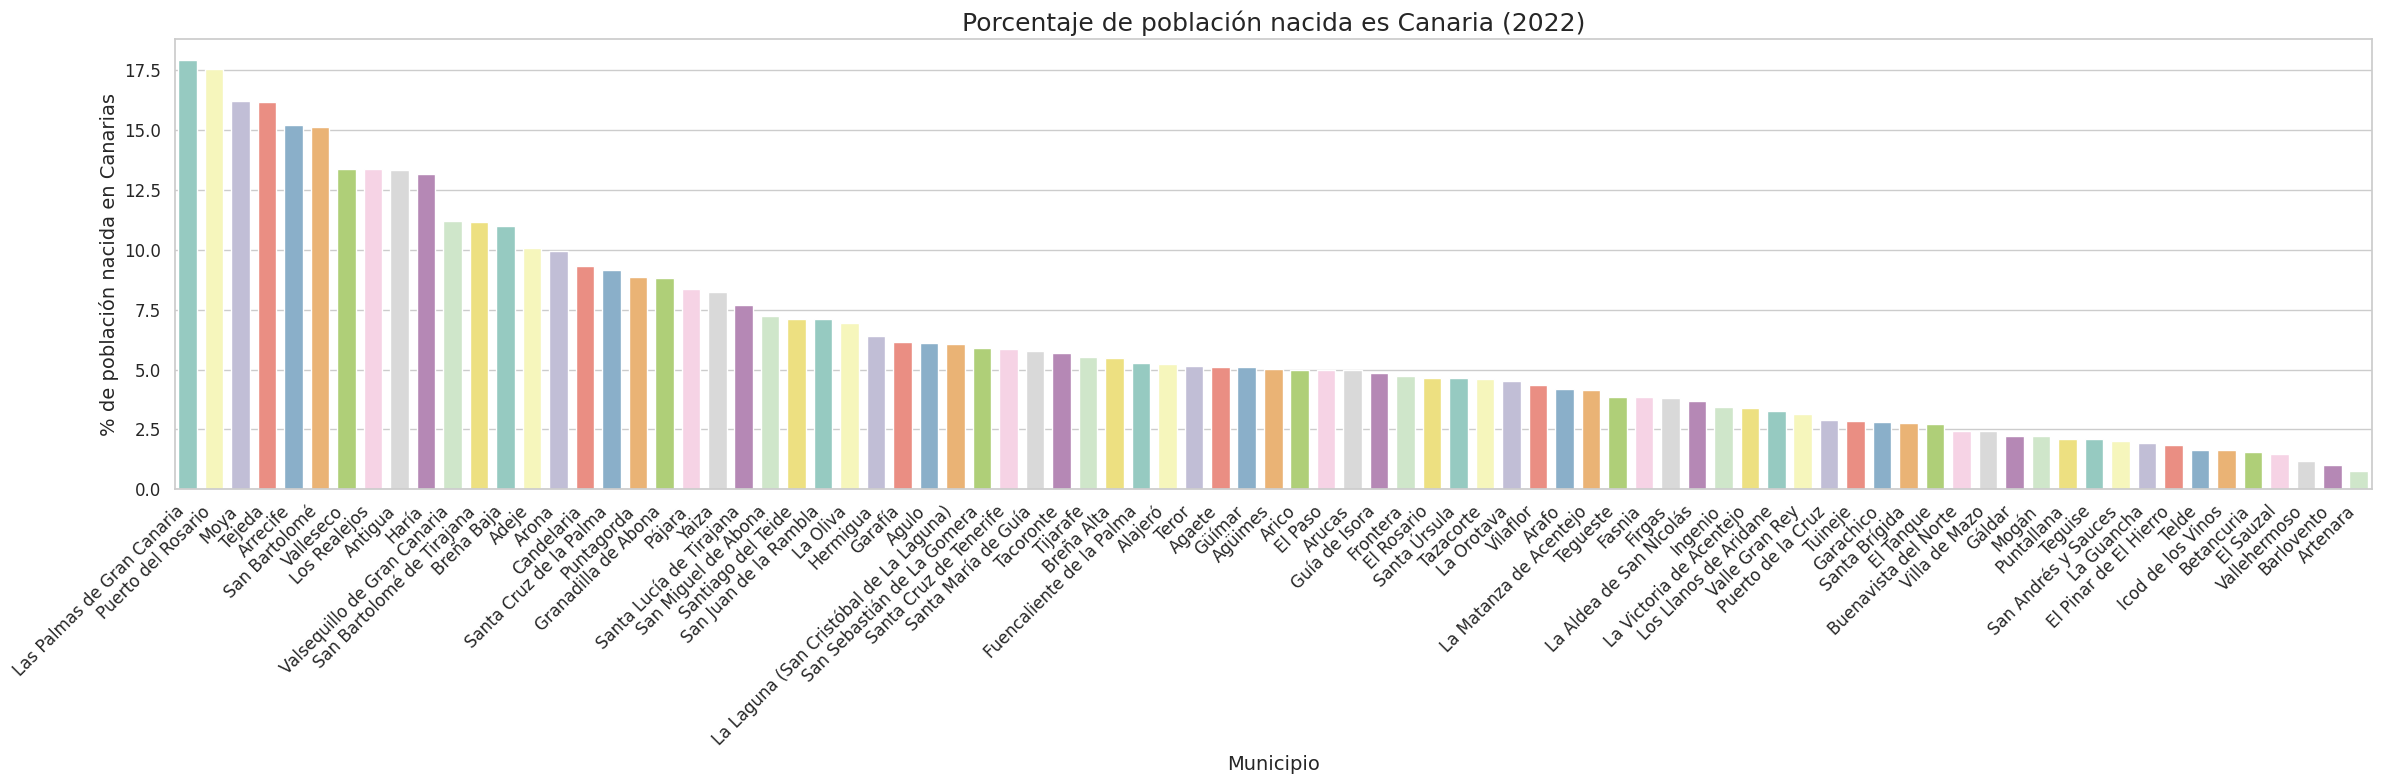

In [44]:
## Porcentaje de población nacida es canaria por municipio
# Diccionario de equivalencias de códigos de municipios de Canarias
codigos_municipios_canarias = {
    # Provincia de Las Palmas (35)
    '35001': 'Agaete',
    '35002': 'Agüimes',
    '35003': 'Antigua',
    '35004': 'Arrecife',
    '35005': 'Artenara',
    '35006': 'Arucas',
    '35007': 'Betancuria',
    '35008': 'Firgas',
    '35009': 'Gáldar',
    '35010': 'Haría',
    '35011': 'Ingenio',
    '35012': 'La Oliva',
    '35013': 'Mogán',
    '35014': 'Moya',
    '35015': 'Las Palmas de Gran Canaria',
    '35016': 'Pájara',
    '35017': 'Puerto del Rosario',
    '35018': 'San Bartolomé',
    '35019': 'San Bartolomé de Tirajana',
    '35020': 'Santa Brígida',
    '35021': 'Santa Lucía de Tirajana',
    '35022': 'Santa María de Guía',
    '35023': 'Teguise',
    '35024': 'Tejeda',
    '35025': 'Telde',
    '35026': 'Teror',
    '35027': 'Tuineje',
    '35028': 'Valleseco',
    '35029': 'Valsequillo de Gran Canaria',
    '35030': 'Yaiza',
    '35031': 'La Aldea de San Nicolás',
    # Provincia de Santa Cruz de Tenerife (38)
    '38001': 'Adeje',
    '38002': 'Agulo',
    '38003': 'Alajeró',
    '38004': 'Arafo',
    '38005': 'Arico',
    '38006': 'Arona',
    '38007': 'Barlovento',
    '38008': 'Breña Alta',
    '38009': 'Breña Baja',
    '38010': 'Buenavista del Norte',
    '38011': 'Candelaria',
    '38012': 'Fasnia',
    '38013': 'Frontera',
    '38014': 'Fuencaliente de la Palma',
    '38015': 'Garachico',
    '38016': 'Garafía',
    '38017': 'Granadilla de Abona',
    '38018': 'La Guancha',
    '38019': 'Guía de Isora',
    '38020': 'Güímar',
    '38021': 'Hermigua',
    '38022': 'Icod de los Vinos',
    '38023': 'La Laguna (San Cristóbal de La Laguna)',
    '38024': 'La Matanza de Acentejo',
    '38025': 'La Orotava',
    '38026': 'La Victoria de Acentejo',
    '38027': 'Los Llanos de Aridane',
    '38028': 'Los Realejos',
    '38029': 'El Paso',
    '38030': 'El Pinar de El Hierro',
    '38031': 'Puerto de la Cruz',
    '38032': 'Puntagorda',
    '38033': 'Puntallana',
    '38034': 'San Andrés y Sauces',
    '38035': 'San Juan de la Rambla',
    '38036': 'San Miguel de Abona',
    '38037': 'San Sebastián de La Gomera',
    '38038': 'Santa Cruz de la Palma',
    '38039': 'Santa Cruz de Tenerife',
    '38040': 'Santa Úrsula',
    '38041': 'Santiago del Teide',
    '38042': 'Tacoronte',
    '38043': 'El Rosario',
    '38044': 'El Sauzal',
    '38045': 'El Tanque',
    '38046': 'Tazacorte',
    '38047': 'Tegueste',
    '38048': 'Tijarafe',
    '38049': 'Valle Gran Rey',
    '38050': 'Vallehermoso',
    '38051': 'Villa de Mazo',
    '38052': 'Vilaflor',
    '38053': 'Yaiza',
    '38013_2007': 'Frontera',
    '35034': 'San Bartolomé de Tirajana',
    '38901': 'Santa Cruz de Tenerife',
    '35033': 'San Bartolomé de Tirajana',
    '35032': 'San Bartolomé de Tirajana',
}

df_poblacion['municipio_nombre'] = df_poblacion['municipio'].map(codigos_municipios_canarias).fillna(df_poblacion['municipio'])
nombre_col = 'municipio_nombre'
año_col = 'ano' if 'ano' in df_poblacion.columns else None
if año_col:
    ultimo_ano = df_poblacion[año_col].max()
    df_filtrado = df_poblacion[df_poblacion[año_col] == ultimo_ano]
else:
    df_filtrado = df_poblacion.copy()
    
# Agrupar por municipio real y calcular el porcentaje de población nacida en Canarias
agrupado = df_filtrado.groupby(nombre_col, as_index=False)['poblacion_nacida_es_xcanarias_pc'].mean()
agrupado = agrupado.sort_values('poblacion_nacida_es_xcanarias_pc', ascending=False)

# Graficar el porcentaje de población nacida en Canarias por municipio
fig, ax = plt.subplots(figsize=(24, 8))  # Más ancho horizontal
sns.barplot(
    data=agrupado, 
    x=nombre_col, 
    y='poblacion_nacida_es_xcanarias_pc', 
    ax=ax, 
    palette='Set3',  # Paleta categórica para máxima diferenciación
    dodge=False,  # No agrupar barras
    width=0.7     # Menor ancho de barra para más espacio
)
ax.set_title(f'Porcentaje de población nacida es Canaria ({ultimo_ano})', fontsize=18)
ax.set_ylabel('% de población nacida en Canarias', fontsize=14)
ax.set_xlabel('Municipio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_6032/1559163677.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


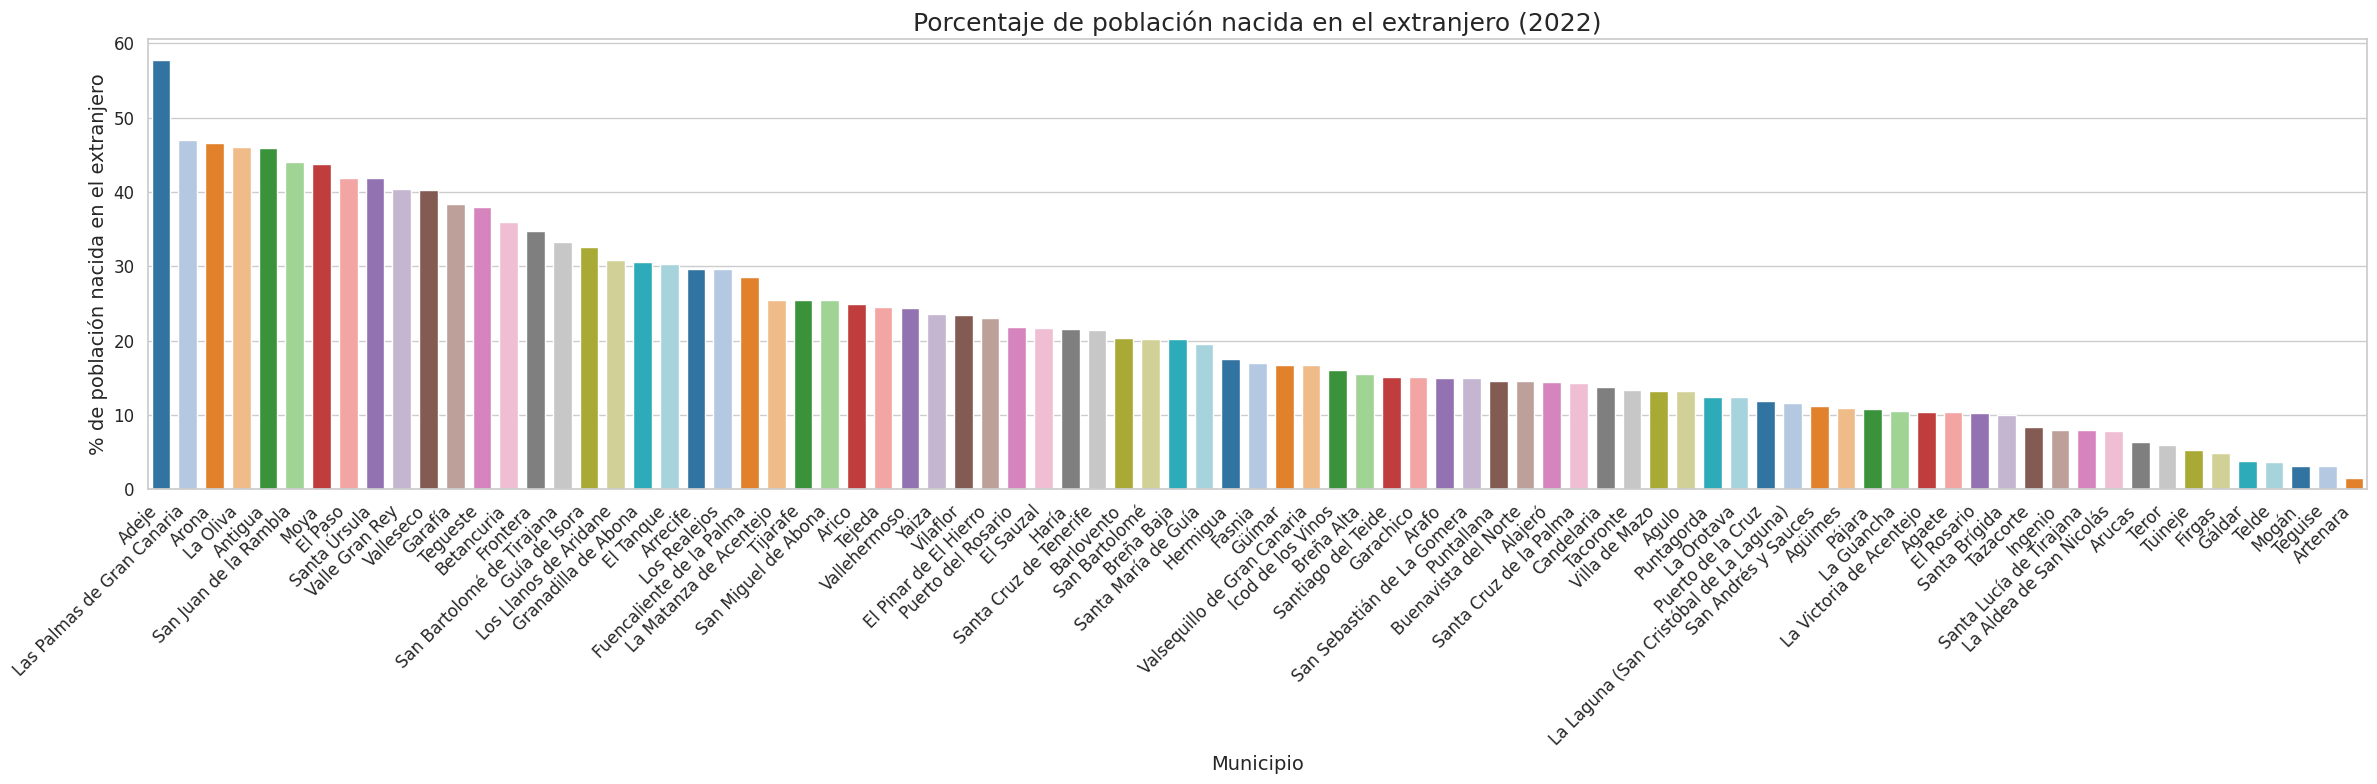

In [45]:
## Porcentaje de población nacida en el extranjero por municipio
# Diccionario de equivalencias de códigos de municipios de Canarias
codigos_municipios_canarias = {
    # Provincia de Las Palmas (35)
    '35001': 'Agaete',
    '35002': 'Agüimes',
    '35003': 'Antigua',
    '35004': 'Arrecife',
    '35005': 'Artenara',
    '35006': 'Arucas',
    '35007': 'Betancuria',
    '35008': 'Firgas',
    '35009': 'Gáldar',
    '35010': 'Haría',
    '35011': 'Ingenio',
    '35012': 'La Oliva',
    '35013': 'Mogán',
    '35014': 'Moya',
    '35015': 'Las Palmas de Gran Canaria',
    '35016': 'Pájara',
    '35017': 'Puerto del Rosario',
    '35018': 'San Bartolomé',
    '35019': 'San Bartolomé de Tirajana',
    '35020': 'Santa Brígida',
    '35021': 'Santa Lucía de Tirajana',
    '35022': 'Santa María de Guía',
    '35023': 'Teguise',
    '35024': 'Tejeda',
    '35025': 'Telde',
    '35026': 'Teror',
    '35027': 'Tuineje',
    '35028': 'Valleseco',
    '35029': 'Valsequillo de Gran Canaria',
    '35030': 'Yaiza',
    '35031': 'La Aldea de San Nicolás',
    # Provincia de Santa Cruz de Tenerife (38)
    '38001': 'Adeje',
    '38002': 'Agulo',
    '38003': 'Alajeró',
    '38004': 'Arafo',
    '38005': 'Arico',
    '38006': 'Arona',
    '38007': 'Barlovento',
    '38008': 'Breña Alta',
    '38009': 'Breña Baja',
    '38010': 'Buenavista del Norte',
    '38011': 'Candelaria',
    '38012': 'Fasnia',
    '38013': 'Frontera',
    '38014': 'Fuencaliente de la Palma',
    '38015': 'Garachico',
    '38016': 'Garafía',
    '38017': 'Granadilla de Abona',
    '38018': 'La Guancha',
    '38019': 'Guía de Isora',
    '38020': 'Güímar',
    '38021': 'Hermigua',
    '38022': 'Icod de los Vinos',
    '38023': 'La Laguna (San Cristóbal de La Laguna)',
    '38024': 'La Matanza de Acentejo',
    '38025': 'La Orotava',
    '38026': 'La Victoria de Acentejo',
    '38027': 'Los Llanos de Aridane',
    '38028': 'Los Realejos',
    '38029': 'El Paso',
    '38030': 'El Pinar de El Hierro',
    '38031': 'Puerto de la Cruz',
    '38032': 'Puntagorda',
    '38033': 'Puntallana',
    '38034': 'San Andrés y Sauces',
    '38035': 'San Juan de la Rambla',
    '38036': 'San Miguel de Abona',
    '38037': 'San Sebastián de La Gomera',
    '38038': 'Santa Cruz de la Palma',
    '38039': 'Santa Cruz de Tenerife',
    '38040': 'Santa Úrsula',
    '38041': 'Santiago del Teide',
    '38042': 'Tacoronte',
    '38043': 'El Rosario',
    '38044': 'El Sauzal',
    '38045': 'El Tanque',
    '38046': 'Tazacorte',
    '38047': 'Tegueste',
    '38048': 'Tijarafe',
    '38049': 'Valle Gran Rey',
    '38050': 'Vallehermoso',
    '38051': 'Villa de Mazo',
    '38052': 'Vilaflor',
    '38053': 'Yaiza',
    '38013_2007': 'Frontera',
    '35034': 'San Bartolomé de Tirajana',
    '38901': 'Santa Cruz de Tenerife',
    '35033': 'San Bartolomé de Tirajana',
    '35032': 'San Bartolomé de Tirajana',
}

df_poblacion['municipio_nombre'] = df_poblacion['municipio'].map(codigos_municipios_canarias).fillna(df_poblacion['municipio'])
nombre_col = 'municipio_nombre'
año_col = 'ano' if 'ano' in df_poblacion.columns else None
if año_col:
    ultimo_ano = df_poblacion[año_col].max()
    df_filtrado = df_poblacion[df_poblacion[año_col] == ultimo_ano]
else:
    df_filtrado = df_poblacion.copy()
    
# Agrupar por municipio real y calcular el porcentaje de población nacida en el extranjero
agrupado = df_filtrado.groupby(nombre_col, as_index=False)['poblacion_nacida_extranjero_pc'].mean()
agrupado = agrupado.sort_values('poblacion_nacida_extranjero_pc', ascending=False)

# Graficar el porcentaje de población nacida en el extranjero por municipio
fig, ax = plt.subplots(figsize=(24, 8))  # Más ancho horizontal
sns.barplot(
    data=agrupado, 
    x=nombre_col, 
    y='poblacion_nacida_extranjero_pc', 
    ax=ax, 
    palette='tab20',  # Paleta categórica diferente para máxima diferenciación
    dodge=False,  # No agrupar barras
    width=0.7     # Menor ancho de barra para más espacio
)
ax.set_title(f'Porcentaje de población nacida en el extranjero ({ultimo_ano})', fontsize=18)
ax.set_ylabel('% de población nacida en el extranjero', fontsize=14)
ax.set_xlabel('Municipio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

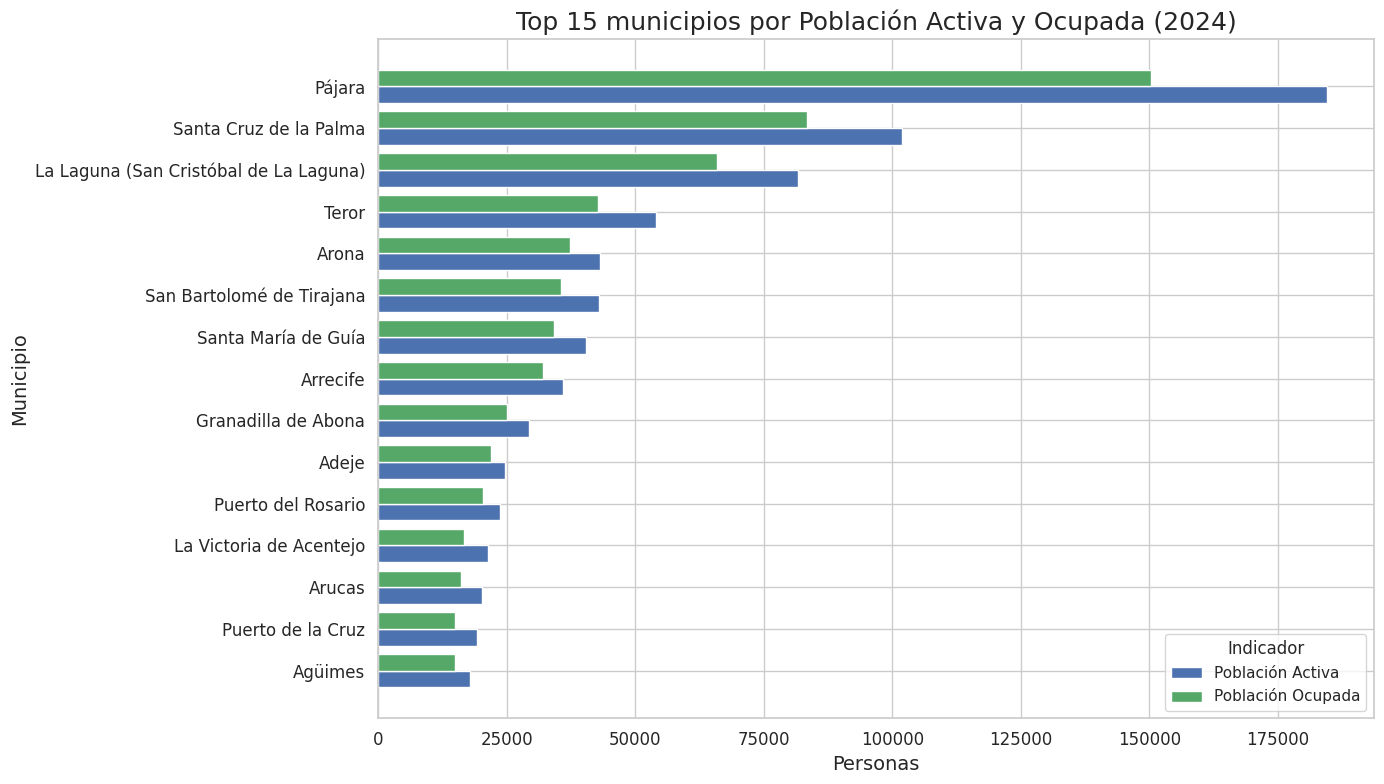

In [53]:
# # 4. Población ocupada vs activa por año (variaciones residenciales)
# Comparativa de Población Activa y Ocupada por municipio (2024) - Mejor legibilidad y nombres reales
import matplotlib.pyplot as plt
import seaborn as sns

codigos_municipios_canarias = {
    # Provincia de Las Palmas (35)
    '35001': 'Agaete',
    '35002': 'Agüimes',
    '35003': 'Antigua',
    '35004': 'Arrecife',
    '35005': 'Artenara',
    '35006': 'Arucas',
    '35007': 'Betancuria',
    '35008': 'Firgas',
    '35009': 'Gáldar',
    '35010': 'Haría',
    '35011': 'Ingenio',
    '35012': 'La Oliva',
    '35013': 'Mogán',
    '35014': 'Moya',
    '35015': 'Las Palmas de Gran Canaria',
    '35016': 'Pájara',
    '35017': 'Puerto del Rosario',
    '35018': 'San Bartolomé',
    '35019': 'San Bartolomé de Tirajana',
    '35020': 'Santa Brígida',
    '35021': 'Santa Lucía de Tirajana',
    '35022': 'Santa María de Guía',
    '35023': 'Teguise',
    '35024': 'Tejeda',
    '35025': 'Telde',
    '35026': 'Teror',
    '35027': 'Tuineje',
    '35028': 'Valleseco',
    '35029': 'Valsequillo de Gran Canaria',
    '35030': 'Yaiza',
    '35031': 'La Aldea de San Nicolás',
    # Provincia de Santa Cruz de Tenerife (38)
    '38001': 'Adeje',
    '38002': 'Agulo',
    '38003': 'Alajeró',
    '38004': 'Arafo',
    '38005': 'Arico',
    '38006': 'Arona',
    '38007': 'Barlovento',
    '38008': 'Breña Alta',
    '38009': 'Breña Baja',
    '38010': 'Buenavista del Norte',
    '38011': 'Candelaria',
    '38012': 'Fasnia',
    '38013': 'Frontera',
    '38014': 'Fuencaliente de la Palma',
    '38015': 'Garachico',
    '38016': 'Garafía',
    '38017': 'Granadilla de Abona',
    '38018': 'La Guancha',
    '38019': 'Guía de Isora',
    '38020': 'Güímar',
    '38021': 'Hermigua',
    '38022': 'Icod de los Vinos',
    '38023': 'La Laguna (San Cristóbal de La Laguna)',
    '38024': 'La Matanza de Acentejo',
    '38025': 'La Orotava',
    '38026': 'La Victoria de Acentejo',
    '38027': 'Los Llanos de Aridane',
    '38028': 'Los Realejos',
    '38029': 'El Paso',
    '38030': 'El Pinar de El Hierro',
    '38031': 'Puerto de la Cruz',
    '38032': 'Puntagorda',
    '38033': 'Puntallana',
    '38034': 'San Andrés y Sauces',
    '38035': 'San Juan de la Rambla',
    '38036': 'San Miguel de Abona',
    '38037': 'San Sebastián de La Gomera',
    '38038': 'Santa Cruz de la Palma',
    '38039': 'Santa Cruz de Tenerife',
    '38040': 'Santa Úrsula',
    '38041': 'Santiago del Teide',
    '38042': 'Tacoronte',
    '38043': 'El Rosario',
    '38044': 'El Sauzal',
    '38045': 'El Tanque',
    '38046': 'Tazacorte',
    '38047': 'Tegueste',
    '38048': 'Tijarafe',
    '38049': 'Valle Gran Rey',
    '38050': 'Vallehermoso',
    '38051': 'Villa de Mazo',
    '38052': 'Vilaflor',
    '38053': 'Yaiza',
    '38013_2007': 'Frontera',
    '35034': 'San Bartolomé de Tirajana',
    '38901': 'Santa Cruz de Tenerife',
    '35033': 'San Bartolomé de Tirajana',
    '35032': 'San Bartolomé de Tirajana',
}

# Asegurarse de que los datos sean numéricos
variaciones['pact_t'] = pd.to_numeric(variaciones['pact_t'], errors='coerce')
variaciones['pocu_t'] = pd.to_numeric(variaciones['pocu_t'], errors='coerce')

# Unir variaciones con grid para obtener el código INE del municipio
variaciones_muni = variaciones.merge(grid[['geocode', 'municipio']], on='geocode', how='left')

# Mapear el código INE al nombre real del municipio
variaciones_muni['municipio_nombre'] = variaciones_muni['municipio'].astype(str).map(codigos_municipios_canarias).fillna(variaciones_muni['municipio'])

# Agrupar por nombre real de municipio y sumar
agrupado = variaciones_muni.groupby('municipio_nombre')[['pact_t', 'pocu_t']].sum().reset_index()

# Seleccionar los 15 municipios con mayor población activa
agrupado_top = agrupado.sort_values('pact_t', ascending=False).head(15)

# Reorganizar para gráfico horizontal
agrupado_top = agrupado_top.sort_values('pact_t', ascending=True)  # Para que el mayor quede arriba

# Graficar barras horizontales con nombres reales
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.4
y = range(len(agrupado_top))

ax.barh([i - bar_width/2 for i in y], agrupado_top['pact_t'], height=bar_width, label='Población Activa', color='#4C72B0')
ax.barh([i + bar_width/2 for i in y], agrupado_top['pocu_t'], height=bar_width, label='Población Ocupada', color='#55A868')

ax.set_yticks(y)
ax.set_yticklabels(agrupado_top['municipio_nombre'], fontsize=12)
ax.set_xlabel('Personas', fontsize=14)
ax.set_ylabel('Municipio', fontsize=14)
ax.set_title('Top 15 municipios por Población Activa y Ocupada (2024)', fontsize=18)
ax.legend(title='Indicador')
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()